### Se incluyen gáficas con comparaciones de los distintos modelos

In [2]:
path_root = r"C:/Users/jgpg000.edu/Desktop/Agente inteligente recuperación sensórica IoT/"
path_graphs = f"{path_root}/testing/figures_test/"
# ruta clases personalizadas
import sys
path_classes = f"{path_root}classes"
sys.path.append(path_classes)

## LIBRERIAS
#import pandas as pd
from class_dataset import *
from fun_graphics import *

### LISTA MODELOS
#### Q16
* baseline
* rag_filtro_equipo
* big_embedder
* baseline_esp
* baseline_esp_large
* rag_filtro_equipo_esp_large
* parent_retriever
* parent_retriever_full_page_v2
* parent_retriever_full_page_v2_model_baseline
* moda_producto_local
* moda_producto_global
* parent_retriever_reranker_cohere_k_15 (k=5,15,30,45,10-20)
* parent_retriever_reranker_cohere_esp_k_15
* esp_large_reranker_cohere
* pr_jinarerank_k_15
* pr_cohere_k15_parentsize_3500 (size = 1500, 2000, 2500, ..., 4500)
* pr_cohere_k15_parent3500_childsize_300 (size = 300, 350, ..., 600)
* pr_cohere_k15_parent3500_child300_filtro
* rag_ensemble
* rag_ensemble2

#### QMerida
* baseline_esp
* pr_cohere_k15_parent3500_childsize_300
* moda_producto_global
* rag_ensemble
* rag_ensemble2

#### Q34
* Aquellos que estén repetidos en Q16 y QMerida

## Generar Excel

In [3]:
path_saved_csv = f"{path_root}testing/responses_test/csv/"
path_saved_excel = f"{path_root}testing/responses_test/excel/"
experimento = "QA-baseline_esp_large-Q16"

## EXPORTAMOS A EXCEL EL DATASET DE RESPUESTAS GENERADAS
qa_exp = QADataset(f"{path_saved_csv}{experimento}.csv")
rqa_filter = qa_exp.show()
nombre_archivo = f"QAGENERATED-{experimento}"
rqa_filter.to_excel(f"{path_saved_csv}{nombre_archivo}.xlsx", index=False)
print(f"Se ha guardado el archivo {nombre_archivo}.xlsx en {path_saved_excel}")

Se ha guardado el archivo QAGENERATED-QA-baseline_esp_large-Q16.xlsx en C:/Users/jgpg000.edu/Desktop/Agente inteligente recuperación sensórica IoT/testing/responses_test/excel/


## Gráficos

### Dos modelos

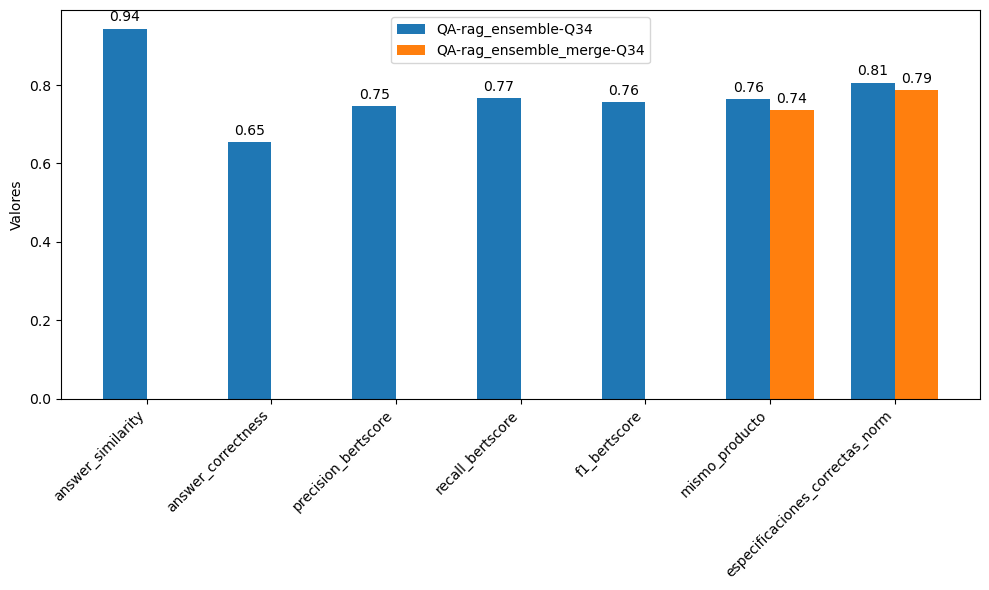

In [3]:
grafico_comparacion("QA-rag_ensemble-Q34", "QA-rag_ensemble_merge-Q34", position_legend="upper center")

### Tres modelos

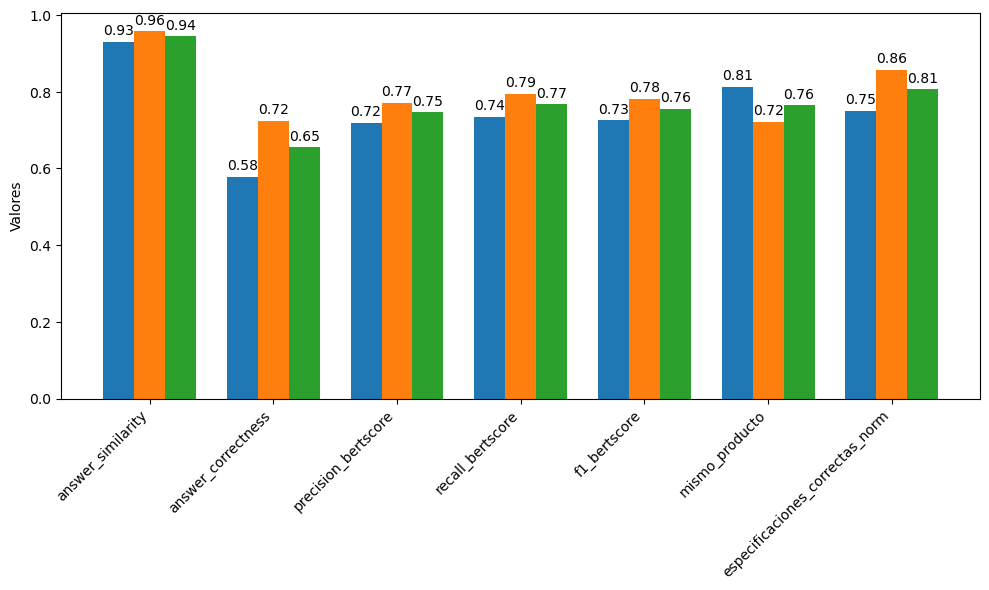

In [10]:
grafico_comparacion3("QA-rag_ensemble-Q16", "QA-rag_ensemble-QMerida", "QA-rag_ensemble-Q34")

### Cuatro modelos

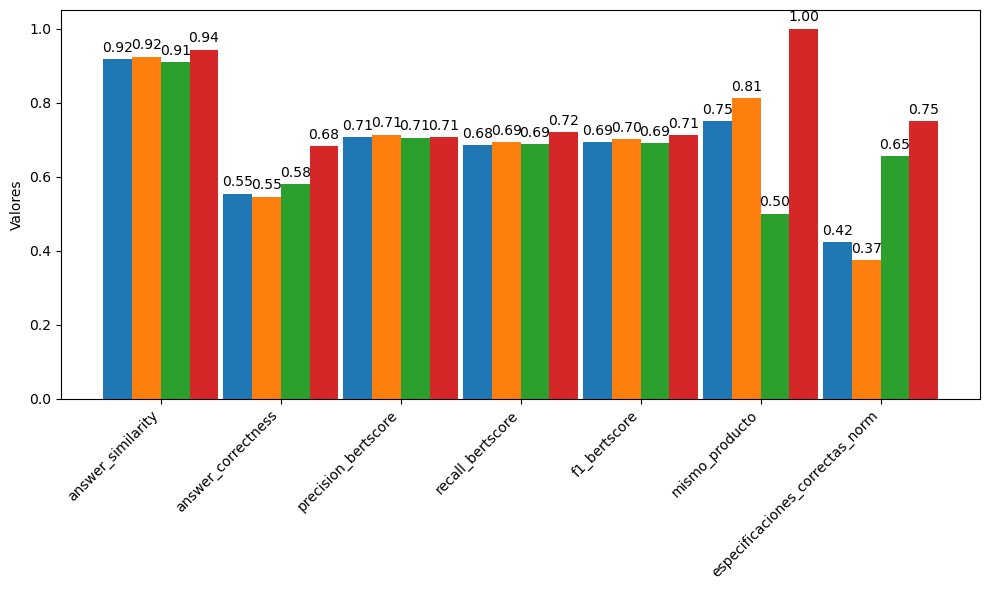

In [14]:
experimento1 = "baseline_esp_large"
experimento2 = "parent_retriever"
experimento3 = "parent_retriever_full_page_v2"
experimento4 = "parent_retriever_full_page_v2_model_baseline"

grafico_comparacion4(f"QA-{experimento1}-Q16", f"QA-{experimento2}-Q16", f"QA-{experimento3}-Q16", f"QA-{experimento4}-Q16")

### Gráfico continuo

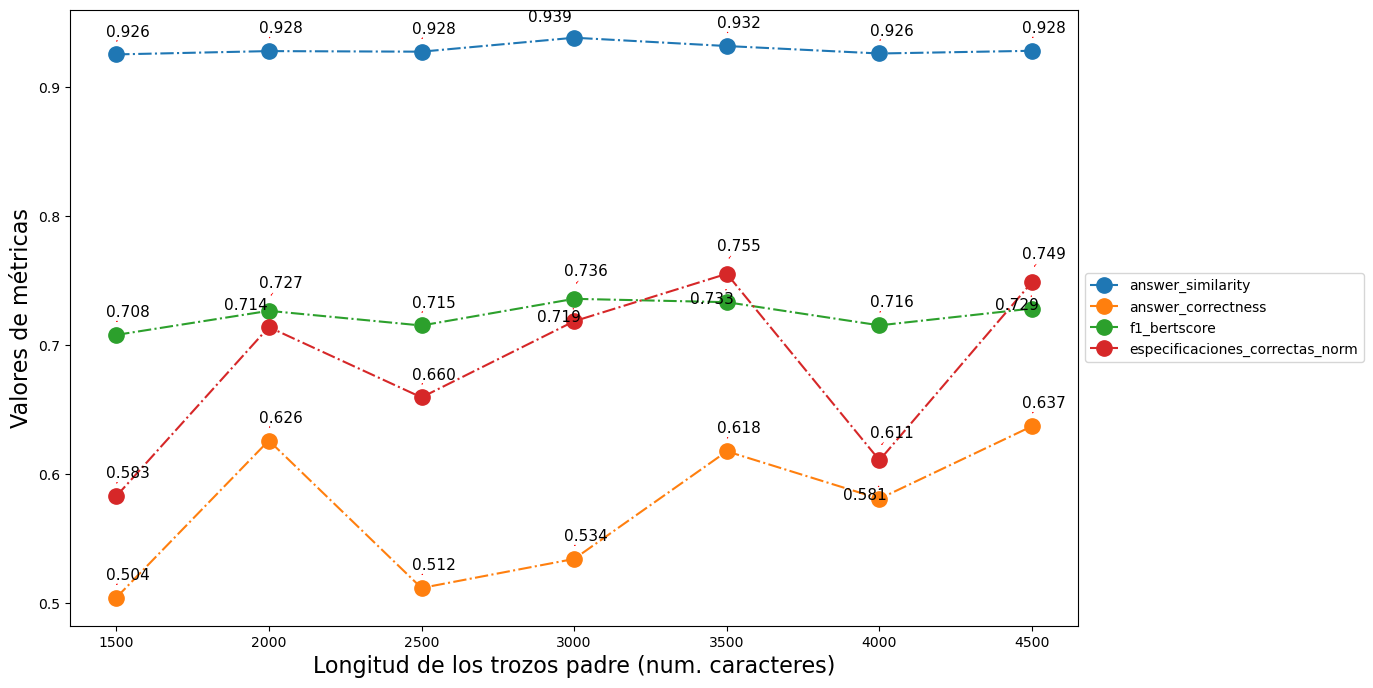

In [17]:
metricas = ['answer_similarity', 'answer_correctness', 'f1_bertscore', 'especificaciones_correctas_norm']
valores_k = range(1500, 5000, 500)
nombre = "Comparación de métricas para distintos tamaños de trozo del parent_splitter"
grafico_comparacion_continuo("QA-pr_cohere_k15_parentsize_", valores_k, nombre, metricas, path_graphs, x_name = "Longitud de los trozos padre (num. caracteres)")

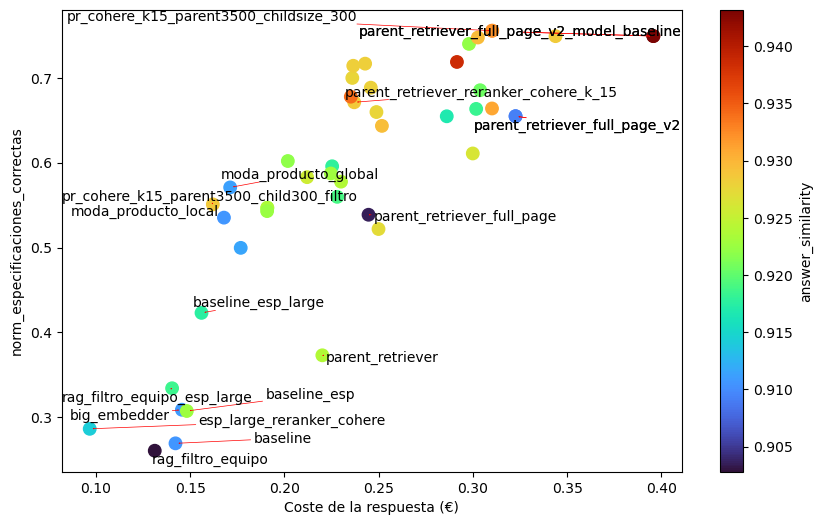

In [18]:
import re
from adjustText import adjust_text

path_metrics = f"{path_root}testing/responses_test/excel/"
df = pd.read_excel(f"{path_metrics}metricasmodelos-Q16.xlsx")

x = df.coste
y = df.norm_especificaciones_correctas
z = df.answer_similarity
w = df.answer_correctness

def comparacion_precio(x, y, z, ruta_grafico: str = "C:/Users/jgpg000.edu/Desktop/Graficos/"):
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.scatter(x, y, c=z, s=80, cmap='turbo')
    plt.colorbar().set_label(z.name)
    plt.xlabel("Coste de la respuesta (€)")
    plt.ylabel(y.name)
    texts = [plt.text(x[i], y[i], df.nombre_modelo[i], ha='center', va='center') for i in range(len(x)) if re.search(r"_k", df.nombre_modelo[i]) == None]
    texts.append(plt.text(x[17], y[17], df.nombre_modelo[17], ha='center', va='center')) # parent_retriever_reranker_cohere_k_15
    texts.append(plt.text(x[38], y[38], df.nombre_modelo[38], ha='center', va='center')) # pr_cohere_k15_parent3500_childsize_300
    texts.append(plt.text(x[45], y[45], df.nombre_modelo[45], ha='center', va='center')) # pr_cohere_k15_parent3500_child300_filtro      
    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
    # guardamos la fig
    plt.savefig(f"{ruta_grafico}grafico_precio_especificaciones_{y.name}.png")
    plt.show()

comparacion_precio(x, y, z, path_graphs)